Date: This column indicates the specific calendar day for which the financial and AI-related data is recorded. It allows for time-series analysis of the trends and impacts.

2) Company: This column specifies the name of the company to which the data in that particular row belongs. Examples include "OpenAI" and "Meta".

3) R&D_Spending_USD_Mn: This column represents the Research and Development (R&D) spending of the company, measured in Millions of USD. It serves as an indicator of a company's investment in innovation and future growth, particularly in the AI sector.

4) AI_Revenue_USD_Mn: This column denotes the revenue generated specifically from AI-related products or services, also measured in Millions of USD. This metric highlights the direct financial success derived from AI initiatives.

5) AI_Revenue_Growth_%: This column shows the percentage growth of AI-related revenue for the company on a daily basis. It indicates the pace at which a company's AI business is expanding or contracting.

6) Event: This column captures any significant events or announcements made by the company that could potentially influence its financial performance or market perception. Examples include "Cloud AI launch," "AI partnership deal," "AI ethics policy update," and "AI speech recognition release." These events are crucial for understanding sudden shifts in stock impact.

7) Stock_Impact_%: This column quantifies the percentage change in the company's stock price on a given day, likely in response to the recorded financial metrics or events. It serves as a direct measure of market reaction.

In [2]:
# Pseudocode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

# Use Jupyter magic for better display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# Markdown: ## AI Financial Data Analysis
# Goal: Analyze and forecast Stock_Impact_% for OpenAI, Google, Meta

In [3]:
df = pd.read_csv(r"C:\Users\USER\Documents\ai_financial_market_daily_realistic_synthetic.csv")

In [4]:
df.head(100) 

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09
...,...,...,...,...,...,...,...
95,2015-04-06,OpenAI,4.76,1.41,41.34,NaN,0.92
96,2015-04-07,OpenAI,4.17,1.01,1.23,NaN,-0.79
97,2015-04-08,OpenAI,4.98,0.52,-48.34,NaN,-0.86
98,2015-04-09,OpenAI,4.80,-0.25,-125.50,NaN,-0.56


In [5]:
df.shape

(10959, 7)

In [6]:
df["Company"].value_counts()

Company
OpenAI    3653
Google    3653
Meta      3653
Name: count, dtype: int64

In [7]:
df.describe()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%
count,10959.00,10959.00,10959.00,10959.00
mean,65.18,44.13,159.40,0.03
std,47.92,41.64,135.46,0.75
min,1.57,-0.55,-155.43,-3.00
25%,8.64,3.61,43.87,-0.50
50%,70.96,35.22,133.75,0.00
75%,99.60,71.68,258.30,0.51
max,163.83,155.96,565.50,18.50


In [8]:
df.isna().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64

In [9]:
df.columns

Index(['Date', 'Company', 'R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn',
       'AI_Revenue_Growth_%', 'Event', 'Stock_Impact_%'],
      dtype='object')

In [10]:
print(df.info())  # Check dtypes, non-null counts
print(df.describe())  # Stats for R&D, revenue, stock impact
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB
None
       R&D_Spending_USD_Mn  AI_Revenue_USD_Mn  AI_Revenue_Growth_%  \
count             10959.00           10959.00             10959.00   
mean                 65.18              44.13               159.40   
std                  47.92              41.64               135.46   
min                   1.57              -0.55              -155.43   
25%                   8.64       

## DATA CLEANING STEPS

In [12]:
# Handle negatives in revenue
df['AI_Revenue_USD_Mn'] = df['AI_Revenue_USD_Mn'].clip(lower=0)  # Clip negatives to 0

# Fill missing events
df['Event'] = df['Event'].fillna('No Event')

In [13]:
# CONVERT DATE TO DATETIME
df["Date"] = pd.to_datetime(df["Date"])

In [14]:
# Extract time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

In [15]:
# Outlier detection (e.g., for Stock_Impact_%)
Q1 = df['Stock_Impact_%'].quantile(0.25)
Q3 = df['Stock_Impact_%'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Stock_Impact_%'] < (Q1 - 1.5 * IQR)) | (df['Stock_Impact_%'] > (Q3 + 1.5 * IQR)))]

In [16]:
df.shape

(10828, 11)

## EXPLORATORY DATA ANALYSIS

1. Total R&D Spending by Companys

Company's spending for R & D in $Bn: Company
Google   418.63
Meta     261.32
OpenAI    26.13
Name: R&D_Spending_USD_Mn, dtype: float64


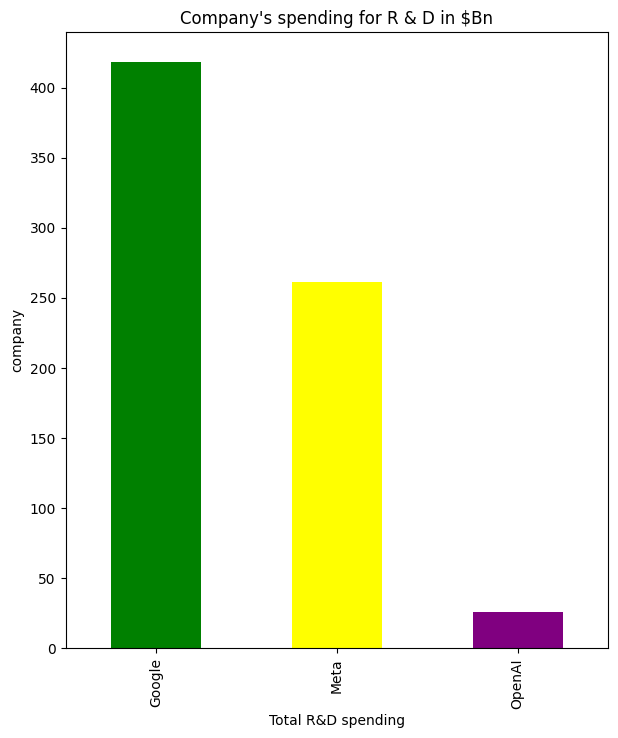

In [19]:

RD = df.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000
print("Company's spending for R & D in $Bn:", RD)

# PLOT BAR CHART
RD.plot(kind="bar",color=["green","yellow","purple"],figsize=(7,8))
plt.xlabel("Total R&D spending")
plt.ylabel("company")
plt.title("Company's spending for R & D in $Bn")
plt.show()

In [20]:
df.columns

Index(['Date', 'Company', 'R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn',
       'AI_Revenue_Growth_%', 'Event', 'Stock_Impact_%', 'Year', 'Month',
       'DayOfWeek', 'Quarter'],
      dtype='object')

2. Revenue Earned by the companies

Company's AI_Revenue_USD_Bn : Company
Google   281.47
Meta     187.18
OpenAI     9.33
Name: AI_Revenue_USD_Mn, dtype: float64


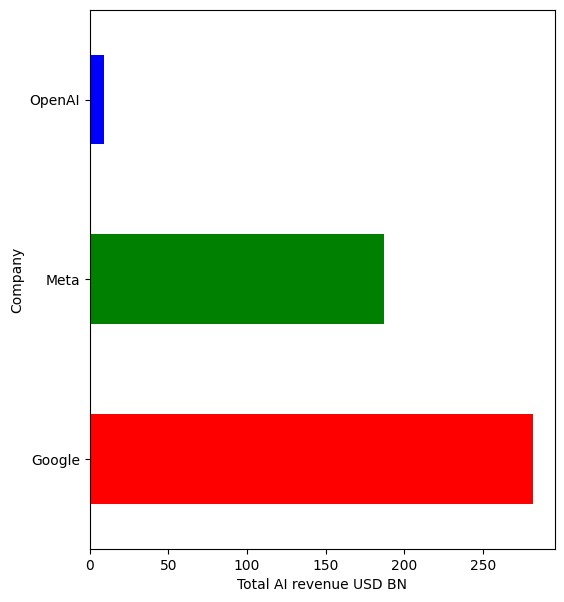

In [22]:

rv = df.groupby("Company")["AI_Revenue_USD_Mn"].sum()/1000
print("Company's AI_Revenue_USD_Bn :", rv)

# plot bar chart
rv.plot(kind="barh",color=["r","g","b"],figsize=(6,7))
plt.xlabel("Total AI revenue USD BN")
plt.ylabel("Company")
plt.show()

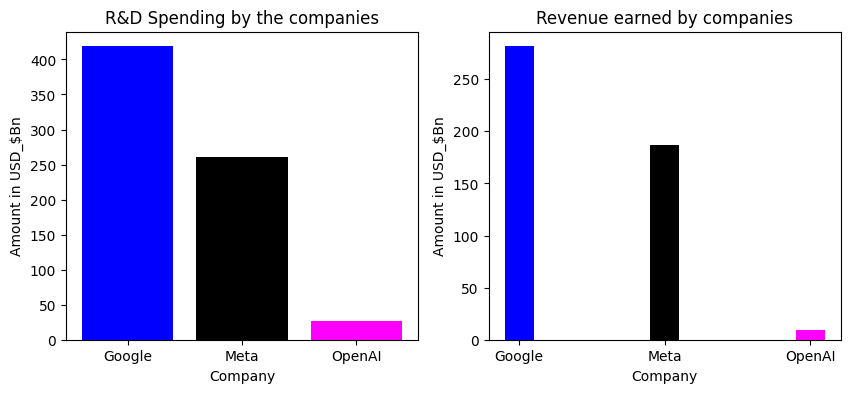

In [23]:
# Bar plots tthat shoes expenditures& revenues

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)

plt.bar(RD.index, RD.values, color = ['blue', 'black', 'magenta'])

plt.title( "R&D Spending by the companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")

plt.subplot(1,2,2)

plt.bar(rv.index, rv.values, color = ['blue', 'black', 'magenta'], width = 0.2)
plt.title( "Revenue earned by companies")
plt.xlabel("Company")
plt.ylabel("Amount in USD_$Bn")
plt.show()


 3. Date-wise Stock Impact by Company

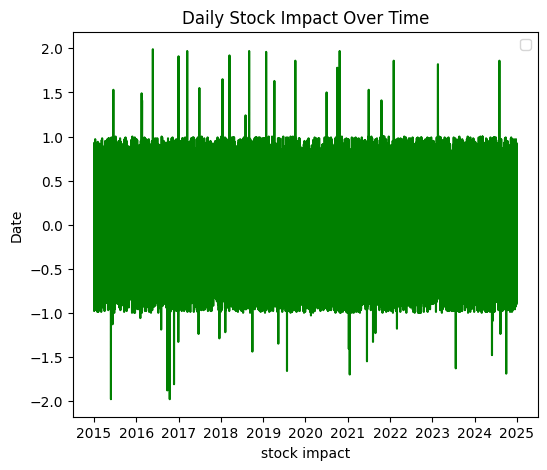

In [25]:
plt.figure(figsize=(6,5))
plt.plot(df["Date"], df["Stock_Impact_%"], color="g")
plt.title("Daily Stock Impact Over Time")
plt.xlabel("stock impact")
plt.ylabel("Date")
plt.legend()
plt.show()

AI Revenue Growth of the companies

  Company   mean  median    std
0  Google 159.82  144.03 132.41
1    Meta 159.25  112.66 132.03
2  OpenAI 158.71  132.94 141.62


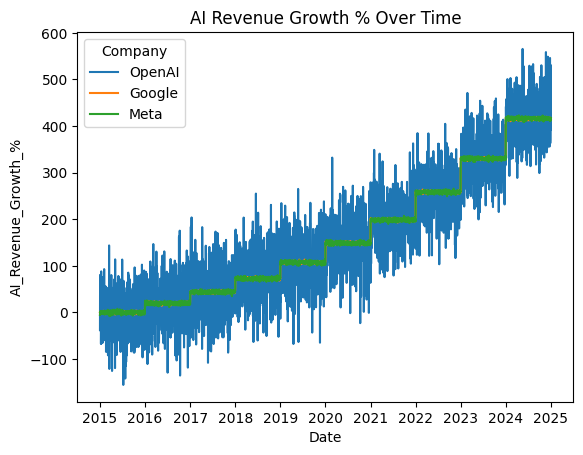

In [27]:
# Code snippet for AI revenue growth
growth = df.groupby('Company')['AI_Revenue_Growth_%'].agg(['mean', 'median', 'std']).reset_index()
print(growth)
growth  #plot Table
sns.lineplot(x='Date', y='AI_Revenue_Growth_%', hue='Company', data=df)
plt.title('AI Revenue Growth % Over Time')
plt.show()

In [28]:
# Company-specific dataframes
df_openai = df[df['Company'] == 'OpenAI'].set_index('Date').sort_index()
df_google = df[df['Company'] == 'Google'].set_index('Date').sort_index()
df_meta = df[df['Company'] == 'Meta'].set_index('Date').sort_index()

In [29]:
# Check stationarity (example for OpenAI Stock_Impact_%)
result = adfuller(df_openai['Stock_Impact_%'])
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')  # If p > 0.05, differencing needed
df_openai['Stock_Impact_diff'] = df_openai['Stock_Impact_%'].diff().dropna()  # Differencing if non-stationary

ADF Statistic: -60.77659837946657, p-value: 0.0


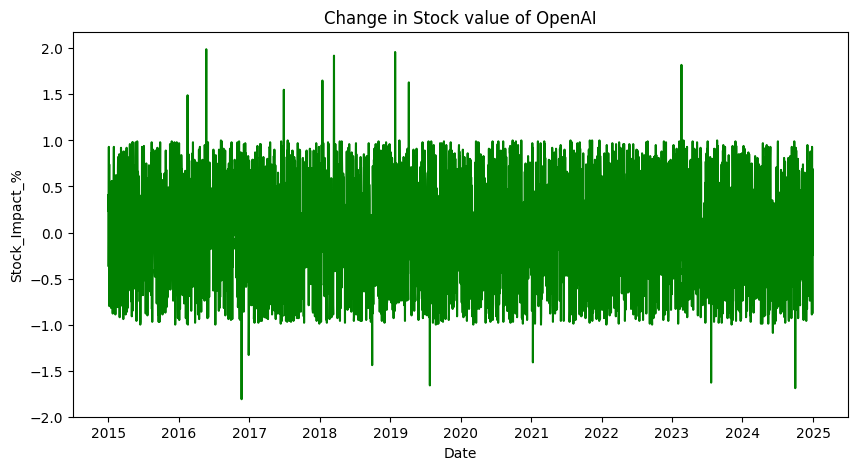

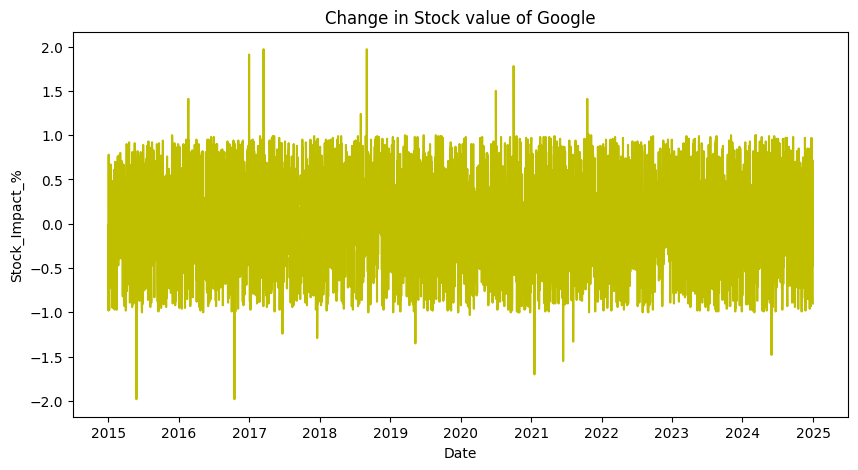

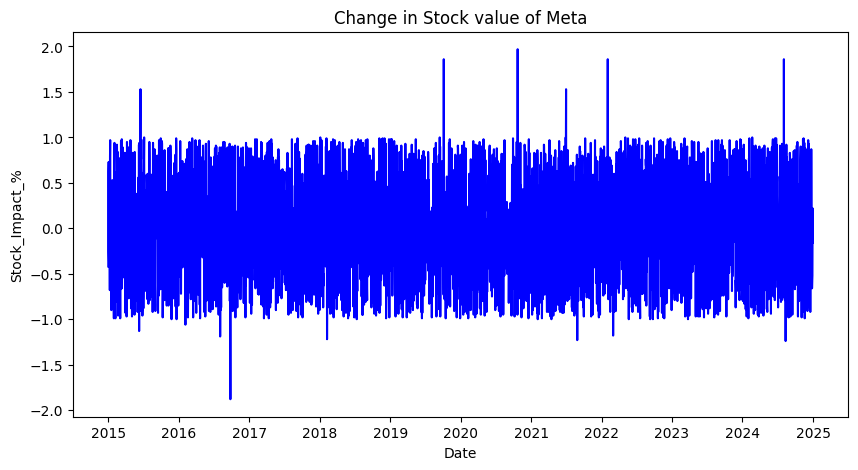

In [30]:
# change in stock value for open_ai while data is the index
plt.figure(figsize = (10,5))

plt.plot(df_openai.index, df_openai['Stock_Impact_%'], color = 'g')

plt.title("Change in Stock value of OpenAI")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()

# change in stock value for google
plt.figure(figsize = (10,5))

plt.plot(df_google.index, df_google['Stock_Impact_%'], color = 'y')

plt.title("Change in Stock value of Google")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()

# change in stock value for meta
plt.figure(figsize = (10,5))

plt.plot(df_meta.index, df_meta['Stock_Impact_%'], color = 'b')

plt.title("Change in Stock value of Meta")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()


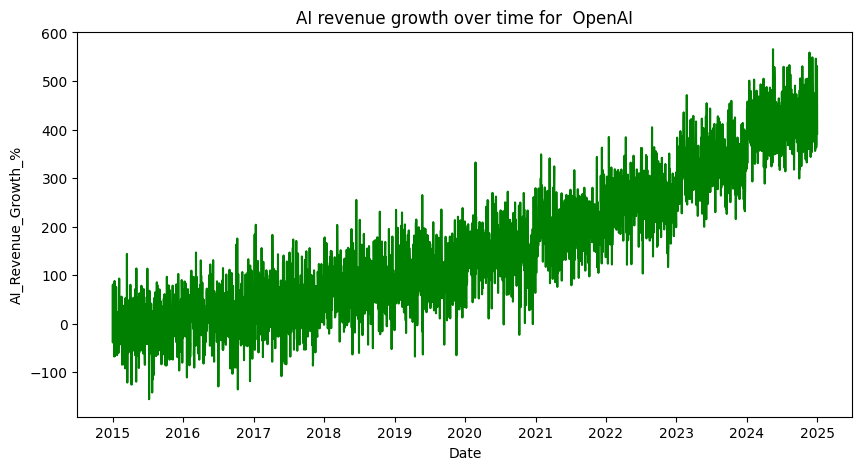

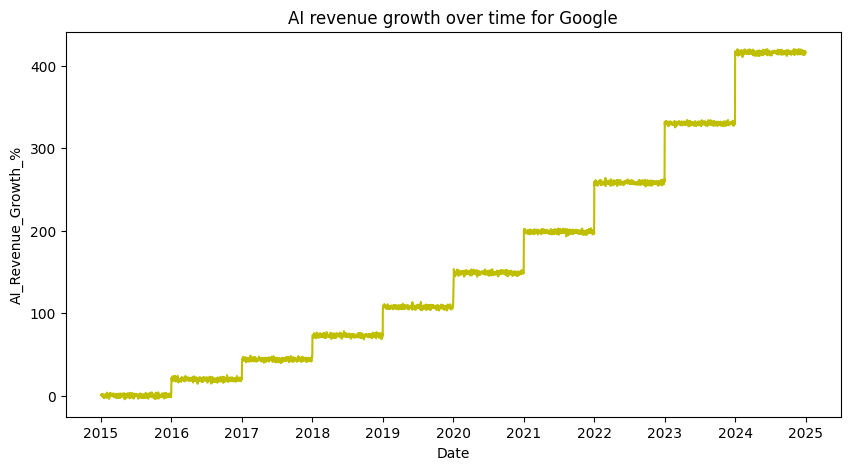

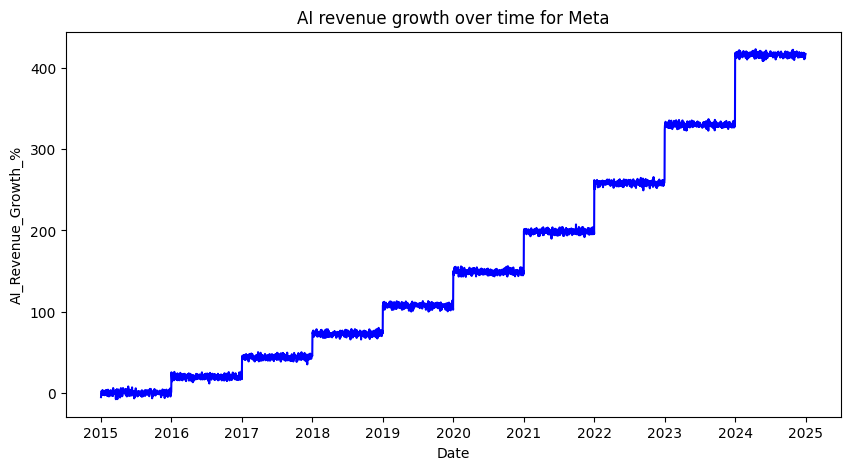

In [31]:
# AI revenue growth for open_ai
plt.figure(figsize = (10,5))

plt.plot(df_openai.index, df_openai['AI_Revenue_Growth_%'], color = 'g')

plt.title("AI revenue growth over time for  OpenAI")
plt.xlabel("Date")
plt.ylabel("AI_Revenue_Growth_%")
plt.show()

# AI revenue growth for google
plt.figure(figsize = (10,5))

plt.plot(df_google.index, df_google['AI_Revenue_Growth_%'], color = 'y')

plt.title("AI revenue growth over time for Google")
plt.xlabel("Date")
plt.ylabel("AI_Revenue_Growth_%")
plt.show()

# AI revenue growth for meta
plt.figure(figsize = (10,5))

plt.plot(df_meta.index, df_meta['AI_Revenue_Growth_%'], color = 'b')

plt.title("AI revenue growth over time for Meta")
plt.xlabel("Date")
plt.ylabel("AI_Revenue_Growth_%")
plt.show()


4. Events when Maximum Stock Impact was observed

In [33]:
df.columns

Index(['Date', 'Company', 'R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn',
       'AI_Revenue_Growth_%', 'Event', 'Stock_Impact_%', 'Year', 'Month',
       'DayOfWeek', 'Quarter'],
      dtype='object')

In [34]:
# OpenAI's Events when Maximum Stock Impact was observed
df_openai.sort_values(by = "Stock_Impact_%", ascending=False).head(10)

,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Month,DayOfWeek,Quarter,Stock_Impact_diff
Date,,,,,,,,,,,
2016-05-23,OpenAI,4.45,1.11,11.19,AI Video Recommendation upgrade,1.99,2016,5,0,2,1.56
2019-01-27,OpenAI,6.80,2.61,161.47,AI ethics policy update,1.96,2019,1,6,1,2.81
2018-03-16,OpenAI,6.48,1.91,90.72,AI ethics policy update,1.92,2018,3,4,1,1.17
2023-02-19,OpenAI,11.73,4.62,362.35,AI Video Recommendation upgrade,1.82,2023,2,6,1,1.10
2018-01-15,OpenAI,6.57,1.27,26.99,AI partnership deal,1.65,2018,1,0,1,1.80
2019-04-08,OpenAI,6.80,2.54,153.55,AI speech recognition release,1.63,2019,4,0,2,1.08
2017-06-29,OpenAI,5.06,1.85,85.47,AI partnership deal,1.55,2017,6,3,2,0.87
2016-02-16,OpenAI,4.97,1.04,4.41,Cloud AI launch,1.49,2016,2,1,1,2.23
2020-09-27,OpenAI,6.98,2.16,116.00,No Event,1.00,2020,9,6,3,0.12


In [35]:
# Google Events when Maximum Stock Impact was observed
df_google.sort_values(by = "Stock_Impact_%", ascending=False).head(10)

,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Month,DayOfWeek,Quarter
Date,,,,,,,,,,
2017-03-16,Google,93.17,42.37,41.22,AI partnership deal,1.97,2017,3,3,1
2018-09-02,Google,99.99,51.89,72.97,Cloud AI launch,1.97,2018,9,6,3
2016-12-31,Google,86.61,36.85,22.84,AI Video Recommendation upgrade,1.91,2016,12,5,4
2020-10-02,Google,119.31,73.86,146.20,AI speech recognition release,1.78,2020,10,4,4
2020-07-02,Google,117.84,74.70,149.00,AI speech recognition release,1.50,2020,7,3,3
2016-02-20,Google,85.76,35.02,16.74,AI Ads Optimization upgrade,1.41,2016,2,5,1
2021-10-19,Google,128.62,89.48,198.26,AI ethics policy update,1.41,2021,10,1,4
2018-08-02,Google,100.98,51.15,70.50,AI ethics policy update,1.24,2018,8,3,3
2021-10-25,Google,124.31,90.02,200.08,AI-powered search update,1.01,2021,10,0,4


In [36]:
# Meta Events when Maximum Stock Impact was observed
df_meta.sort_values(by = "Stock_Impact_%", ascending=False).head(10)

,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Month,DayOfWeek,Quarter
Date,,,,,,,,,,
2020-10-23,Meta,73.49,49.58,147.89,AI Ads Optimization upgrade,1.97,2020,10,4,4
2022-02-02,Meta,84.29,71.82,259.09,AI Ads Optimization upgrade,1.86,2022,2,2,1
2019-10-06,Meta,67.91,42.20,111.01,AI Video Recommendation upgrade,1.86,2019,10,6,4
2024-08-03,Meta,100.86,103.06,415.30,Cloud AI launch,1.86,2024,8,5,3
2015-06-17,Meta,49.21,19.65,-1.76,AI partnership deal,1.53,2015,6,2,2
2021-07-01,Meta,79.66,59.44,197.18,AI partnership deal,1.53,2021,7,3,3
2021-06-29,Meta,81.30,59.55,197.73,No Event,1.00,2021,6,1,2
2015-07-06,Meta,52.06,19.89,-0.56,No Event,1.00,2015,7,0,3
2024-02-21,Meta,100.47,103.84,419.19,No Event,1.00,2024,2,2,1


5. Correlation between the columns

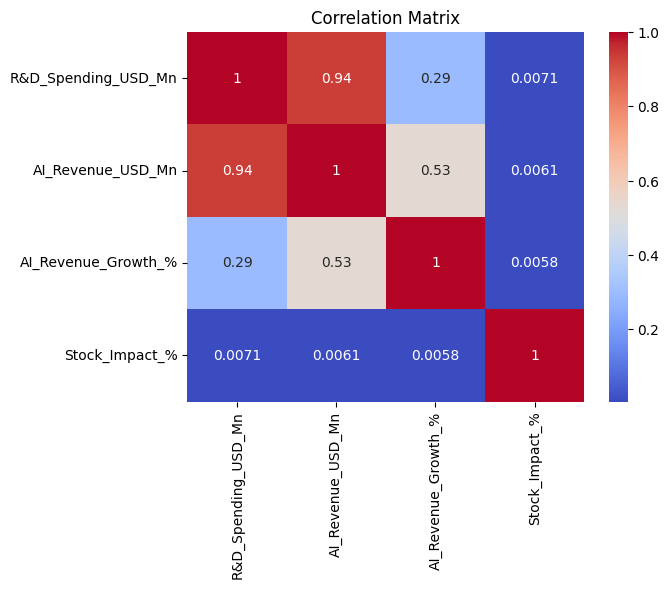

In [38]:
#  correlation MATRIX
numerical_cols = ['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn', 'AI_Revenue_Growth_%', 'Stock_Impact_%']  # Add engineered if needed
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

7. Year-by-Year Expenditure vs Revenue

In [40]:
yearlyspend = df.groupby("Year")["R&D_Spending_USD_Mn"].sum()

yearlyspend

Year
2015   48544.09
2016   52671.72
2017   56870.64
2018   61722.75
2019   66403.88
2020   71138.80
2021   77464.51
2022   83749.07
2023   89877.41
2024   97635.02
Name: R&D_Spending_USD_Mn, dtype: float64

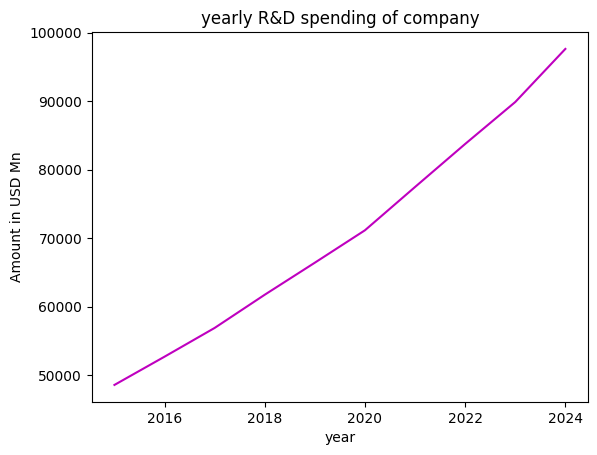

In [41]:
# plot line chart
plt.plot(yearlyspend.index,yearlyspend.values,color = "m")
plt.title("yearly R&D spending of company")
plt.xlabel("year")
plt.ylabel("Amount in USD Mn")
plt.show()

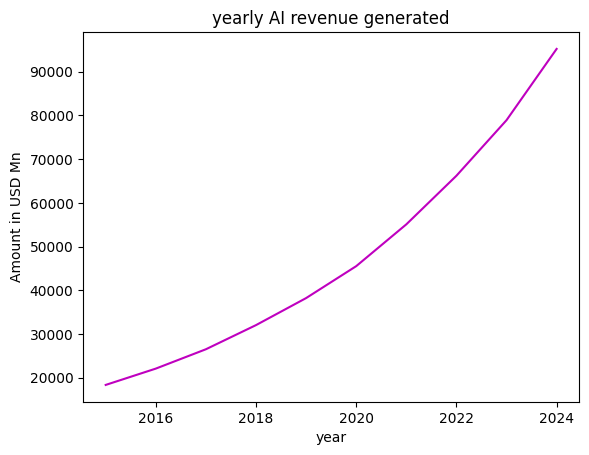

In [42]:
yearlyrev = df.groupby("Year")["AI_Revenue_USD_Mn"].sum()

yearlyrev

# plot line chart
plt.plot(yearlyrev.index,yearlyrev.values,color = "m")
plt.title("yearly AI revenue generated")
plt.xlabel("year")
plt.ylabel("Amount in USD Mn")
plt.show()

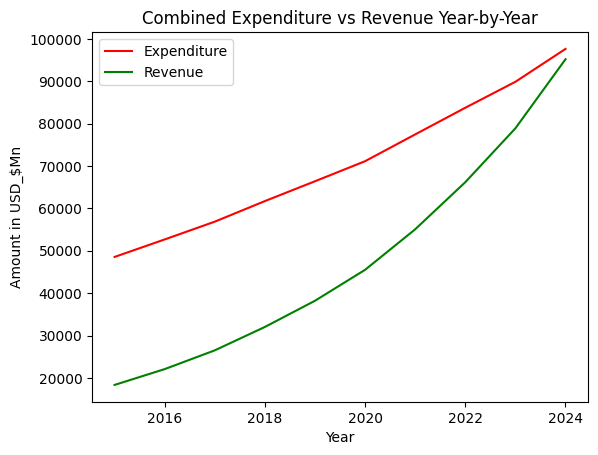

In [43]:
plt.plot(yearlyspend.index, yearlyspend.values, color = 'r')
plt.plot( yearlyrev.index, yearlyrev.values, color = 'g')

plt.title( "Combined Expenditure vs Revenue Year-by-Year", fontsize = 12)
plt.xlabel("Year")
plt.ylabel("Amount in USD_$Mn")

plt.legend(['Expenditure', 'Revenue'])

plt.show()


6. Event Impact Analysis

                             Event  Avg Stock Impact %  Max Stock Impact %  \
1  AI Video Recommendation upgrade                0.06                1.99   
0      AI Ads Optimization upgrade                0.16                1.97   
3              AI partnership deal                0.15                1.97   
6                  Cloud AI launch                0.11                1.97   
2          AI ethics policy update                0.33                1.96   
4    AI speech recognition release               -0.25                1.78   
5         AI-powered search update               -0.49                1.01   
7                         No Event                0.00                1.00   

   Avg AI Revenue Growth %  
1                   149.20  
0                   184.04  
3                   113.41  
6                   103.07  
2                   165.86  
4                   131.91  
5                   220.67  
7                   159.34  


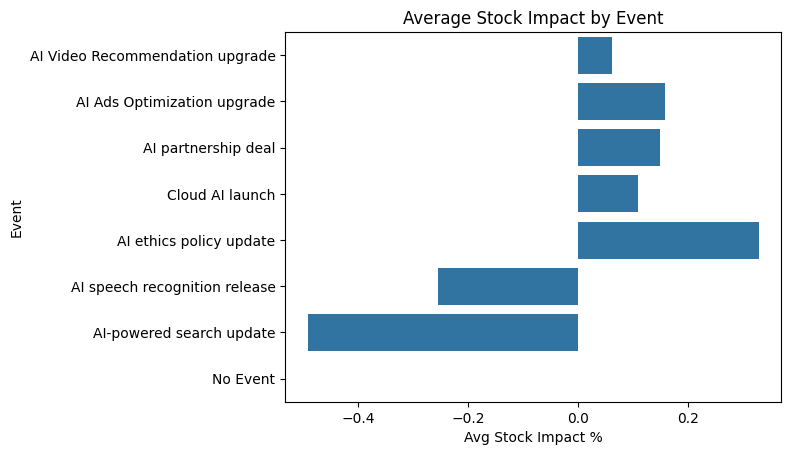

In [45]:
# average stock impact by event 
event_analysis = df[df['Event'].notna()].groupby('Event').agg({
    'Stock_Impact_%': ['mean', 'max'],
    'AI_Revenue_Growth_%': 'mean'
}).reset_index()
event_analysis.columns = ['Event', 'Avg Stock Impact %', 'Max Stock Impact %', 'Avg AI Revenue Growth %']
event_analysis = event_analysis.sort_values(by='Max Stock Impact %', ascending=False)
print(event_analysis.head(10))
event_analysis  # Table
sns.barplot(x='Avg Stock Impact %', y='Event', data=event_analysis.head(10))
plt.title('Average Stock Impact by Event')
plt.show()


In [46]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Month,DayOfWeek,Quarter
0,2015-01-01,OpenAI,5.92,0.63,-36.82,No Event,-0.36,2015,1,3,1
1,2015-01-02,OpenAI,5.41,1.81,80.59,No Event,0.41,2015,1,4,1
2,2015-01-03,OpenAI,4.50,0.61,-38.88,No Event,0.23,2015,1,5,1
3,2015-01-04,OpenAI,5.45,0.95,-5.34,No Event,0.93,2015,1,6,1
4,2015-01-05,OpenAI,3.40,1.48,48.45,No Event,-0.09,2015,1,0,1


## Feature engineering

In [49]:
# Lag and rolling features (for OpenAI)
df_openai['AI_Revenue_Lag7'] = df_openai['AI_Revenue_USD_Mn'].shift(7)
df_openai['Stock_Impact_Rolling7'] = df_openai['Stock_Impact_%'].rolling(window=7).mean()



Time Series Forecasting Models

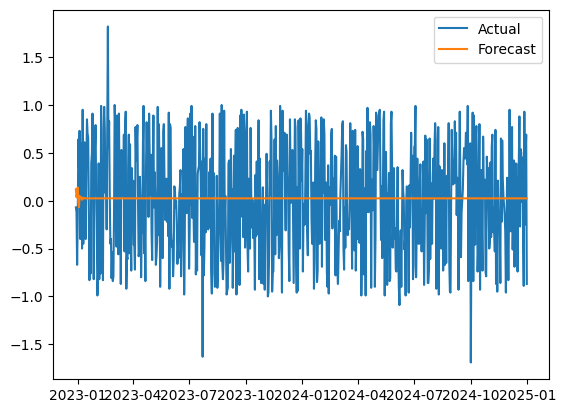

MSE: 0.340072223254055


In [51]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = df_openai['Stock_Impact_%'][:int(0.8*len(df_openai))]
test =  df_openai['Stock_Impact_%'][int(0.8*len(df_openai)):]
model = ARIMA(train, order=(5,1,0))  # Tune p,d,q with auto_arima from pmdarima
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()
# Metrics: from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(test, forecast))